# Introduction
This notebook is a first part of [eargasm-spotify](https://github.com/adamsiemaszkiewicz/eargasm-music) repository meant to visualize data from the [eargasm music](https://open.spotify.com/user/eargasmusic?si=HtTLbkG6QoqkdKU3uTRjAQ) Spotify channel. 

# Set up environment

## Google Drive mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My Drive/Colab Notebooks/eargasm-music/

/content/gdrive/My Drive/Colab Notebooks/eargasm-music


In [3]:
!ls

all_playlists.csv   basic_info.csv		      final_df.csv
audio_analysis.csv  eargasm_data-retrieval.ipynb      genres.csv
audio_features.csv  eargasm_data-visualisation.ipynb  README.md


## Import libraries and functions

## Install missing libraries

In [4]:
!pip install ipympl

### System

In [5]:
import timeit

### Notebook
https://ipywidgets.readthedocs.io/
https://kapernikov.com/ipywidgets-with-matplotlib/

In [6]:
from tqdm.notebook import tqdm # for progress bars
from ipywidgets import interact
import ipywidgets as widgets

### Data science

In [7]:
import pandas as pd # for data manipulation & analysis
import numpy as np # for linear algebra

### Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
Let's load the data fetched from the [Eargasm Music](https://open.spotify.com/user/eargasmusic?si=cz4VzEi1RgaUup_g8-UnEg) Spotify channel using `eargasm_retrieve-data.ipynb`. The data set consists of the tracks with their features as well as a playlist name label.

In [9]:
final_df = pd.read_csv('final_df.csv', index_col=0)

In [10]:
final_df

,track_id,track_artist,track_artistid,track_name,track_duration,track_popularity,track_releasedate,track_preview,track_image,track_url,track_playlist,track_genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,key,key_confidence,mode,mode_confidence,number_of_sections,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1ua6hBq18qZLyprXjMcpyf,Virgil Howe,6d3Hil7Y1xq0oEhtaDxEUg,Someday,251266,43,2009-10-19,https://p.scdn.co/mp3-preview/a2bdcba6acda937f...,https://i.scdn.co/image/ab67616d0000b27356dc5e...,https://open.spotify.com/track/1ua6hBq18qZLypr...,eargasm | breathe easy,NaN,0.370,0.483,0.462,0.210000,0.0875,0.0290,0.3510,9.0,0.292,0.0,0.398,12.0,86.502,0.160,4.0,1.000
1,42VpxSdGQgnV1UJkWeGYkA,Cass McCombs,2iUVQjheBnvOt8vaBrxXJz,Switch,254233,52,2016-08-26,https://p.scdn.co/mp3-preview/d0feea85b84ce9f5...,https://i.scdn.co/image/ab67616d0000b27396782c...,https://open.spotify.com/track/42VpxSdGQgnV1UJ...,eargasm | breathe easy,alternative country,0.362,0.682,0.538,0.000123,0.3240,0.0283,0.7130,7.0,0.743,0.0,0.453,12.0,98.003,0.583,4.0,1.000
2,1g8A166soQjwl1ihqBWKGW,The Slow Revolt,7cfCmW2AFiMNdpJdY0vJsr,Lean,207699,0,2016-09-09,NaN,https://i.scdn.co/image/ab67616d0000b273ce48d6...,https://open.spotify.com/track/1g8A166soQjwl1i...,eargasm | breathe easy,vapor pop,0.195,0.536,0.753,0.801000,0.1200,0.0309,0.6760,1.0,0.655,1.0,0.368,12.0,85.036,0.325,4.0,0.979
3,6cAVWcj8TQ5yR2T6BZjnOg,Dirty Nice,4MGA6AM4iZ2HYc6b77og9g,Zero Summer,212640,0,2017-06-09,NaN,https://i.scdn.co/image/ab67616d0000b2733a028c...,https://open.spotify.com/track/6cAVWcj8TQ5yR2T...,eargasm | breathe easy,NaN,0.742,0.663,0.509,0.000006,0.1120,0.0889,0.3030,11.0,0.547,1.0,0.560,12.0,125.088,0.476,4.0,0.845
4,3YA509E9ki7a3Ic9cf25Vt,Alex Ebert,1me05HW5s7TShHra5nN7uE,Broken Record,274800,47,2017-05-05,https://p.scdn.co/mp3-preview/96c62ba3b9d730d3...,https://i.scdn.co/image/ab67616d0000b2738a6904...,https://open.spotify.com/track/3YA509E9ki7a3Ic...,eargasm | breathe easy,alternative americana,0.240,0.464,0.570,0.001210,0.1380,0.0400,0.5480,0.0,0.905,1.0,0.753,12.0,170.556,0.183,4.0,0.799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,7KcTpjtgreexlmorl41QeT,Sebastian Kamae,7GsvnIE0bUBu6WZXO3ryJe,Sequoia,228000,21,2018-02-27,https://p.scdn.co/mp3-preview/4bfab56eb42cb468...,https://i.scdn.co/image/ab67616d0000b273a96460...,https://open.spotify.com/track/7KcTpjtgreexlmo...,eargasm | weightless,lo-fi beats,0.982,0.419,0.270,0.955000,0.0789,0.0282,0.0738,1.0,0.531,0.0,0.552,12.0,72.444,0.209,4.0,0.956
3617,7sljgxqi3fK5vmV7t2St1l,Loma,4oCcCzMjKNCjQTzxtVlOJT,Black Willow - Single Version,239458,41,2017-11-15,https://p.scdn.co/mp3-preview/8a3f928d152318da...,https://i.scdn.co/image/ab67616d0000b27336ed83...,https://open.spotify.com/track/7sljgxqi3fK5vmV...,eargasm | weightless,chamber psych,0.852,0.672,0.339,0.013900,0.1140,0.0247,0.3040,3.0,0.300,0.0,0.473,12.0,139.988,0.319,4.0,0.946
3618,3pMMsJOMjgk2k9dMNTrrDu,Sylvain Daniel,0uUIxKwkvqgcHmFRnvEn8G,Reminiscences,344969,21,2018-03-02,https://p.scdn.co/mp3-preview/aa2d6b892f6f425f...,https://i.scdn.co/image/ab67616d0000b273164412...,https://open.spotify.com/track/3pMMsJOMjgk2k9d...,eargasm | weightless,NaN,0.843,0.712,0.199,0.575000,0.1060,0.0369,0.0930,8.0,0.774,0.0,0.426,12.0,116.038,0.682,4.0,0.431
3619,01CBH5z1p01xSEsiSSykSx,Pearl De Luna,1puNKd1JxQc5ULmcei2mb3,London Lullaby,297752,19,2018-01-26,https://p.scdn.co/mp3-preview/a0818019d3190145...,https://i.scdn.co/image/ab67616d0000b2734b8f9d...,https://open.spotify.com/track/01CBH5z1p01xSEs...,eargasm | weightless,NaN,0.798,0.613,0.364,0.000356,0.1340,0.1290,0.3340,4.0,0.626,0.0,0.610,12.0,133.653,0.052,4.0,1.000


# Statistics

- juxtaposition i.e. popularity vs bmp
- main features of each playlist
- correlation heatmap
- mean values for feature of each palylist
- genre value count
- most/least mean of each playlist
- matrix of images of songs
- most popular artist
- each column mean min max
- most popular artist

## Popularity
input -> function -> graph

In [11]:
def single_playlist_df(playlist):
  df = final_df.loc[final_df['track_playlist'] == playlist]

  return df

In [12]:
 def popularity_plot(playlist_name):
   """
    Print the popularity of songs of a playlist.
   """

   df = single_playlist_df(playlist_name)
   
   sns.set_style('darkgrid')
   sns.displot(df,
               x='track_popularity',
               binwidth=5,
               color='orange',
               kde=True)
   plt.xlim(0, 100);
   plt.ylim(0, 50);
   plt.ylabel('Number of tracks');
   plt.xlabel('Popularity of a track');
   

In [13]:
most_popular = final_df[['track_id', 'track_artist', 'track_name', 'track_popularity', 'track_preview']]
most_popular = most_popular.sort_values(by=['track_popularity'],
                                        ascending=False)
most_popular.head()

,track_id,track_artist,track_name,track_popularity,track_preview
650,2hwOoMtWPtTSSn6WHV7Vp5,Mac Miller,Blue World,74,https://p.scdn.co/mp3-preview/3fe6ac844ff30952...
3404,0d6bZwEAi1XblGRhnzPfgC,Bon Iver,"Hey, Ma",70,https://p.scdn.co/mp3-preview/625ef5d640863ea2...
2900,1TuopWDIuDi1553081zvuU,Home,Resonance,70,https://p.scdn.co/mp3-preview/5b86600b6de2e612...
2901,1TuopWDIuDi1553081zvuU,Home,Resonance,70,https://p.scdn.co/mp3-preview/5b86600b6de2e612...
2079,41SwdQIX8Hy2u6fuEDgvWr,KAYTRANADA,10%,68,https://p.scdn.co/mp3-preview/8da5c5a803c7966d...


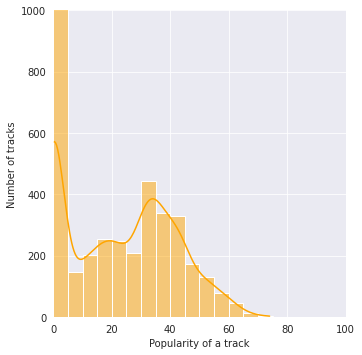

In [14]:
sns.set_style('darkgrid')
sns.displot(final_df,
            x='track_popularity',
            binwidth=5,
            color='orange',
            kde=True)
plt.xlim(0, 100);
plt.ylim(0, 1000);
plt.ylabel('Number of tracks');
plt.xlabel('Popularity of a track');

In [15]:
playlist_names = final_df['track_playlist'].unique()
widgets.interact(popularity_plot, playlist_name=playlist_names);

interactive(children=(Dropdown(description='playlist_name', options=('eargasm | breathe easy', "eargasm | kick…

## Audio features

In [16]:
final_df

,track_id,track_artist,track_artistid,track_name,track_duration,track_popularity,track_releasedate,track_preview,track_image,track_url,track_playlist,track_genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,key,key_confidence,mode,mode_confidence,number_of_sections,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1ua6hBq18qZLyprXjMcpyf,Virgil Howe,6d3Hil7Y1xq0oEhtaDxEUg,Someday,251266,43,2009-10-19,https://p.scdn.co/mp3-preview/a2bdcba6acda937f...,https://i.scdn.co/image/ab67616d0000b27356dc5e...,https://open.spotify.com/track/1ua6hBq18qZLypr...,eargasm | breathe easy,NaN,0.370,0.483,0.462,0.210000,0.0875,0.0290,0.3510,9.0,0.292,0.0,0.398,12.0,86.502,0.160,4.0,1.000
1,42VpxSdGQgnV1UJkWeGYkA,Cass McCombs,2iUVQjheBnvOt8vaBrxXJz,Switch,254233,52,2016-08-26,https://p.scdn.co/mp3-preview/d0feea85b84ce9f5...,https://i.scdn.co/image/ab67616d0000b27396782c...,https://open.spotify.com/track/42VpxSdGQgnV1UJ...,eargasm | breathe easy,alternative country,0.362,0.682,0.538,0.000123,0.3240,0.0283,0.7130,7.0,0.743,0.0,0.453,12.0,98.003,0.583,4.0,1.000
2,1g8A166soQjwl1ihqBWKGW,The Slow Revolt,7cfCmW2AFiMNdpJdY0vJsr,Lean,207699,0,2016-09-09,NaN,https://i.scdn.co/image/ab67616d0000b273ce48d6...,https://open.spotify.com/track/1g8A166soQjwl1i...,eargasm | breathe easy,vapor pop,0.195,0.536,0.753,0.801000,0.1200,0.0309,0.6760,1.0,0.655,1.0,0.368,12.0,85.036,0.325,4.0,0.979
3,6cAVWcj8TQ5yR2T6BZjnOg,Dirty Nice,4MGA6AM4iZ2HYc6b77og9g,Zero Summer,212640,0,2017-06-09,NaN,https://i.scdn.co/image/ab67616d0000b2733a028c...,https://open.spotify.com/track/6cAVWcj8TQ5yR2T...,eargasm | breathe easy,NaN,0.742,0.663,0.509,0.000006,0.1120,0.0889,0.3030,11.0,0.547,1.0,0.560,12.0,125.088,0.476,4.0,0.845
4,3YA509E9ki7a3Ic9cf25Vt,Alex Ebert,1me05HW5s7TShHra5nN7uE,Broken Record,274800,47,2017-05-05,https://p.scdn.co/mp3-preview/96c62ba3b9d730d3...,https://i.scdn.co/image/ab67616d0000b2738a6904...,https://open.spotify.com/track/3YA509E9ki7a3Ic...,eargasm | breathe easy,alternative americana,0.240,0.464,0.570,0.001210,0.1380,0.0400,0.5480,0.0,0.905,1.0,0.753,12.0,170.556,0.183,4.0,0.799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,7KcTpjtgreexlmorl41QeT,Sebastian Kamae,7GsvnIE0bUBu6WZXO3ryJe,Sequoia,228000,21,2018-02-27,https://p.scdn.co/mp3-preview/4bfab56eb42cb468...,https://i.scdn.co/image/ab67616d0000b273a96460...,https://open.spotify.com/track/7KcTpjtgreexlmo...,eargasm | weightless,lo-fi beats,0.982,0.419,0.270,0.955000,0.0789,0.0282,0.0738,1.0,0.531,0.0,0.552,12.0,72.444,0.209,4.0,0.956
3617,7sljgxqi3fK5vmV7t2St1l,Loma,4oCcCzMjKNCjQTzxtVlOJT,Black Willow - Single Version,239458,41,2017-11-15,https://p.scdn.co/mp3-preview/8a3f928d152318da...,https://i.scdn.co/image/ab67616d0000b27336ed83...,https://open.spotify.com/track/7sljgxqi3fK5vmV...,eargasm | weightless,chamber psych,0.852,0.672,0.339,0.013900,0.1140,0.0247,0.3040,3.0,0.300,0.0,0.473,12.0,139.988,0.319,4.0,0.946
3618,3pMMsJOMjgk2k9dMNTrrDu,Sylvain Daniel,0uUIxKwkvqgcHmFRnvEn8G,Reminiscences,344969,21,2018-03-02,https://p.scdn.co/mp3-preview/aa2d6b892f6f425f...,https://i.scdn.co/image/ab67616d0000b273164412...,https://open.spotify.com/track/3pMMsJOMjgk2k9d...,eargasm | weightless,NaN,0.843,0.712,0.199,0.575000,0.1060,0.0369,0.0930,8.0,0.774,0.0,0.426,12.0,116.038,0.682,4.0,0.431
3619,01CBH5z1p01xSEsiSSykSx,Pearl De Luna,1puNKd1JxQc5ULmcei2mb3,London Lullaby,297752,19,2018-01-26,https://p.scdn.co/mp3-preview/a0818019d3190145...,https://i.scdn.co/image/ab67616d0000b2734b8f9d...,https://open.spotify.com/track/01CBH5z1p01xSEs...,eargasm | weightless,NaN,0.798,0.613,0.364,0.000356,0.1340,0.1290,0.3340,4.0,0.626,0.0,0.610,12.0,133.653,0.052,4.0,1.000


In [17]:
df = final_df[['track_id', 'track_artist', 'track_name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']]
df

,track_id,track_artist,track_name,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,1ua6hBq18qZLyprXjMcpyf,Virgil Howe,Someday,0.370,0.483,0.462,0.210000,0.0875,0.0290,0.3510
1,42VpxSdGQgnV1UJkWeGYkA,Cass McCombs,Switch,0.362,0.682,0.538,0.000123,0.3240,0.0283,0.7130
2,1g8A166soQjwl1ihqBWKGW,The Slow Revolt,Lean,0.195,0.536,0.753,0.801000,0.1200,0.0309,0.6760
3,6cAVWcj8TQ5yR2T6BZjnOg,Dirty Nice,Zero Summer,0.742,0.663,0.509,0.000006,0.1120,0.0889,0.3030
4,3YA509E9ki7a3Ic9cf25Vt,Alex Ebert,Broken Record,0.240,0.464,0.570,0.001210,0.1380,0.0400,0.5480
...,...,...,...,...,...,...,...,...,...,...
3616,7KcTpjtgreexlmorl41QeT,Sebastian Kamae,Sequoia,0.982,0.419,0.270,0.955000,0.0789,0.0282,0.0738
3617,7sljgxqi3fK5vmV7t2St1l,Loma,Black Willow - Single Version,0.852,0.672,0.339,0.013900,0.1140,0.0247,0.3040
3618,3pMMsJOMjgk2k9dMNTrrDu,Sylvain Daniel,Reminiscences,0.843,0.712,0.199,0.575000,0.1060,0.0369,0.0930
3619,01CBH5z1p01xSEsiSSykSx,Pearl De Luna,London Lullaby,0.798,0.613,0.364,0.000356,0.1340,0.1290,0.3340


## Compare playlists

In [18]:
 def audio_features_plot(feature1, feature2):
   """
    Print the popularity of songs of a playlist.
   """
   filtered_df = final_df

   sns.set_style('darkgrid')
   sns.relplot(x=feature1, y=feature2, hue='track_playlist', data=filtered_df);
   

In [38]:
def test(checkbox1, checkbox2):
  with output:
    if checkbox1 == True:
      sns.set_style('darkgrid')
      sns.relplot(x='danceability',
                  y='energy',
                  hue='track_playlist',
                  data=final_df)
    elif checkbox1 == False:
      sns.set_style('darkgrid')
      sns.relplot(x='danceability',
                  y='energy',
                  hue='track_playlist',
                  data=final_df)
    elif checkbox2 == True:
      sns.set_style('darkgrid')
      sns.relplot(x='speechiness',
                  y='liveness',
                  hue='track_playlist',
                  data=final_df)
    elif checkbox2 == False:
      sns.set_style('darkgrid')
      sns.relplot(x='speechiness',
                  y='liveness',
                  hue='track_playlist',
                  data=final_df)
    else: print('dupa')

In [39]:
# playlist_names = final_df['track_playlist'].unique()
# checkbox = widgets.Checkbox(description='checkbox',
#                             value=True)
# widgets.interact(audio_features_plot, feature1='dupa', feature2='srupa')
output = widgets.Output()

checkbox1 = widgets.Checkbox(description='eargasm | breathe easy', value=True)
checkbox2 = widgets.Checkbox(description='eargasm | weightless', value=True)
widgets.VBox(
    [
        checkbox1,
        checkbox2
    ]
)
checkbox1.observe(test, 'value')
checkbox2.observe(test, 'value')

controls = widgets.VBox([checkbox1, checkbox2])
widgets.VBox([controls, output])


In [59]:
def test_plot(checkbox1, feature1):
  if checkbox1 == True:
    sns.set_style('darkgrid')
    sns.relplot(x=feature1,
                    y='liveness',
                    hue='track_playlist',
                    data=final_df)
  else:
    sns.set_style('darkgrid')
    sns.relplot(x=feature1,
                    y='liveness',
                    hue='track_playlist',
                    data=final_df)

feature_list = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
w1 = widgets.interact(test_plot, checkbox1=True);
w2 = widgets.interact(test_plot, feature1=feature_list)

# widgets.interact(popularity_plot, playlist_name=playlist_names);

ValueError: ignored

In [103]:
# filtered_df = final_df.loc[(final_df['track_playlist'] == 'eargasm | ptsd') and (final_df['track_playlist'] == 'eargasm | weightless')]
# filtered_df = final_df.query('final_df["track_platlist"] == "eargasm | ptsd"')
# filtered_df = final_df.loc[(final_df['track_playlist'] == 'eargasm | ptsd') or final_df['track_playlist'] == 'eargasm | weightless']
filtered_df = final_df[final_df['track_playlist'].isin(['eargasm | ptsd', 'eargasm | weightless', 'eargasm | breathe easy']) ]
filtered_df

# df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]
# df.query('B > 50 and C != 900')
# df.loc[(df['A'] > 10) & (df['B'] < 15)]

,track_id,track_artist,track_artistid,track_name,track_duration,track_popularity,track_releasedate,track_preview,track_image,track_url,track_playlist,track_genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,key,key_confidence,mode,mode_confidence,number_of_sections,tempo,tempo_confidence,time_signature,time_signature_confidence
0,1ua6hBq18qZLyprXjMcpyf,Virgil Howe,6d3Hil7Y1xq0oEhtaDxEUg,Someday,251266,43,2009-10-19,https://p.scdn.co/mp3-preview/a2bdcba6acda937f...,https://i.scdn.co/image/ab67616d0000b27356dc5e...,https://open.spotify.com/track/1ua6hBq18qZLypr...,eargasm | breathe easy,NaN,0.370,0.483,0.462,0.210000,0.0875,0.0290,0.3510,9.0,0.292,0.0,0.398,12.0,86.502,0.160,4.0,1.000
1,42VpxSdGQgnV1UJkWeGYkA,Cass McCombs,2iUVQjheBnvOt8vaBrxXJz,Switch,254233,52,2016-08-26,https://p.scdn.co/mp3-preview/d0feea85b84ce9f5...,https://i.scdn.co/image/ab67616d0000b27396782c...,https://open.spotify.com/track/42VpxSdGQgnV1UJ...,eargasm | breathe easy,alternative country,0.362,0.682,0.538,0.000123,0.3240,0.0283,0.7130,7.0,0.743,0.0,0.453,12.0,98.003,0.583,4.0,1.000
2,1g8A166soQjwl1ihqBWKGW,The Slow Revolt,7cfCmW2AFiMNdpJdY0vJsr,Lean,207699,0,2016-09-09,NaN,https://i.scdn.co/image/ab67616d0000b273ce48d6...,https://open.spotify.com/track/1g8A166soQjwl1i...,eargasm | breathe easy,vapor pop,0.195,0.536,0.753,0.801000,0.1200,0.0309,0.6760,1.0,0.655,1.0,0.368,12.0,85.036,0.325,4.0,0.979
3,6cAVWcj8TQ5yR2T6BZjnOg,Dirty Nice,4MGA6AM4iZ2HYc6b77og9g,Zero Summer,212640,0,2017-06-09,NaN,https://i.scdn.co/image/ab67616d0000b2733a028c...,https://open.spotify.com/track/6cAVWcj8TQ5yR2T...,eargasm | breathe easy,NaN,0.742,0.663,0.509,0.000006,0.1120,0.0889,0.3030,11.0,0.547,1.0,0.560,12.0,125.088,0.476,4.0,0.845
4,3YA509E9ki7a3Ic9cf25Vt,Alex Ebert,1me05HW5s7TShHra5nN7uE,Broken Record,274800,47,2017-05-05,https://p.scdn.co/mp3-preview/96c62ba3b9d730d3...,https://i.scdn.co/image/ab67616d0000b2738a6904...,https://open.spotify.com/track/3YA509E9ki7a3Ic...,eargasm | breathe easy,alternative americana,0.240,0.464,0.570,0.001210,0.1380,0.0400,0.5480,0.0,0.905,1.0,0.753,12.0,170.556,0.183,4.0,0.799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,7KcTpjtgreexlmorl41QeT,Sebastian Kamae,7GsvnIE0bUBu6WZXO3ryJe,Sequoia,228000,21,2018-02-27,https://p.scdn.co/mp3-preview/4bfab56eb42cb468...,https://i.scdn.co/image/ab67616d0000b273a96460...,https://open.spotify.com/track/7KcTpjtgreexlmo...,eargasm | weightless,lo-fi beats,0.982,0.419,0.270,0.955000,0.0789,0.0282,0.0738,1.0,0.531,0.0,0.552,12.0,72.444,0.209,4.0,0.956
3617,7sljgxqi3fK5vmV7t2St1l,Loma,4oCcCzMjKNCjQTzxtVlOJT,Black Willow - Single Version,239458,41,2017-11-15,https://p.scdn.co/mp3-preview/8a3f928d152318da...,https://i.scdn.co/image/ab67616d0000b27336ed83...,https://open.spotify.com/track/7sljgxqi3fK5vmV...,eargasm | weightless,chamber psych,0.852,0.672,0.339,0.013900,0.1140,0.0247,0.3040,3.0,0.300,0.0,0.473,12.0,139.988,0.319,4.0,0.946
3618,3pMMsJOMjgk2k9dMNTrrDu,Sylvain Daniel,0uUIxKwkvqgcHmFRnvEn8G,Reminiscences,344969,21,2018-03-02,https://p.scdn.co/mp3-preview/aa2d6b892f6f425f...,https://i.scdn.co/image/ab67616d0000b273164412...,https://open.spotify.com/track/3pMMsJOMjgk2k9d...,eargasm | weightless,NaN,0.843,0.712,0.199,0.575000,0.1060,0.0369,0.0930,8.0,0.774,0.0,0.426,12.0,116.038,0.682,4.0,0.431
3619,01CBH5z1p01xSEsiSSykSx,Pearl De Luna,1puNKd1JxQc5ULmcei2mb3,London Lullaby,297752,19,2018-01-26,https://p.scdn.co/mp3-preview/a0818019d3190145...,https://i.scdn.co/image/ab67616d0000b2734b8f9d...,https://open.spotify.com/track/01CBH5z1p01xSEs...,eargasm | weightless,NaN,0.798,0.613,0.364,0.000356,0.1340,0.1290,0.3340,4.0,0.626,0.0,0.610,12.0,133.653,0.052,4.0,1.000


In [155]:
 def audio_features_comparison(feature1, feature2, playlist_name):
   """
    Compare the audio features of songs within a playlist.
   """

   filtered_df = final_df[final_df['track_playlist'].isin(multi.value) ]

   sns.set_style('darkgrid')
   sns.relplot(x=feature1,
               y=feature2,
               data=filtered_df,
               hue='track_playlist',
               color='green')
   plt.xlim(0, 1);
   plt.ylim(0, 1);

feature_list = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
widgets.interact(audio_features_comparison, feature1=feature_list, feature2=feature_list, playlist_name=playlist_names)
multi = widgets.SelectMultiple(options=playlist_names,
                       value=['eargasm | glide', 'eargasm | get moving'],
                       description='select playlists')
multi
# widgets.interactive(audio_features_comparison, {'manual': True},
#                     multi = widgets.SelectMultiple(options=playlist_names, value=['eargasm | glide', 'eargasm | get moving'], description='select playlists'))

# slow = interactive(slow_function, {'manual': True}, i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4))
# slow

interactive(children=(Dropdown(description='feature1', options=('acousticness', 'danceability', 'energy', 'ins…

SelectMultiple(description='select playlists', index=(13, 23), options=('eargasm | breathe easy', "eargasm | k…

# Single playlist analysis
- min-max & mean of each value
- average length
- image matrix
- average: duration, popularity, release date
- min/max: popularity
- most/least & most typical popular genre

1. min-max-avg track duration
2. min-max-avg track popularity
3. min-max-avg track release date
4. track image matrix
5. most popular genre/tag cloud
6. acousticness, danceability, energy, isntrumentalness, liveness, speechiness, valence
7. key, mode, tempo, time-signature, number of sections

# References

- https://github.com/tgel0/spotify-data
- https://www.kaggle.com/aeryan/spotify-music-analysis
- https://www.kaggle.com/arpita28/analysis-of-spotify-trends
- https://www.kaggle.com/jsongunsw/spotify-datasets
- https://www.kaggle.com/mohitkr05/spotify-data-visualization
- https://www.kaggle.com/karthiknc/spotify-visualisation-analysis
- https://www.kaggle.com/souhardyaganguly/spotify-svm
- https://www.kaggle.com/lowkimhoe/prediction-model-on-spotify-classification
- https://www.kaggle.com/pavansanagapati/birds-sounds-eda-spotify-urban-sound-eda
- https://www.kaggle.com/shadey/spotify
- https://medium.com/swlh/creating-waveforms-out-of-spotify-tracks-b22030dd442b
- https://vsupalov.com/analyze-spotify-music-library-with-jupyter-pandas/
- https://www.youtube.com/watch?v=v-9Mpe7NhkM
- http://harpolea.github.io/2018-05-09-spotipy
- https://medium.com/analytics-vidhya/music-genre-classification-with-python-51bff77adfd6
recommendations(seed_artists=None, seed_genres=None, seed_tracks=None, limit=20, country=None, **kwargs)

- http://harpolea.github.io/2018-05-09-spotipy